importing the libraries

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

importing the dataset

In [2]:
df=pd.read_csv("C:/Users/asus/Downloads/car data.csv")

EDA -Data analysis ,DM,DE,DV

In [3]:
#show top 5 rows of the DataFrame 
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
#showing how many rows and columns in DataFrame
df.shape

(301, 9)

In [5]:
#Finding the unique value in each column
print('Fuel Type',df.Fuel_Type.unique())
print('Seller Type',df.Seller_Type.unique())
print('Transmission',df.Transmission.unique())
print("Owner Type",df.Owner.unique())

Fuel Type ['Petrol' 'Diesel' 'CNG']
Seller Type ['Dealer' 'Individual']
Transmission ['Manual' 'Automatic']
Owner Type [0 1 3]


In [6]:
#Checking null value in each column
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
#Find the gap between current year to car year.
#it's mean how many year car is old?
df['current_year']=2024
df['no_of_year']=df['current_year']-df['Year']

In [8]:
#Showing the top 5 rows of DataFrame
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,no_of_year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2024,10
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2024,11
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2024,7
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2024,13
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2024,10


In [9]:
#drop the columns ->Car_Name,Year,current_year
df.drop(['Car_Name',"Year",'current_year'],axis=1,inplace=True)

In [10]:
#Showing the top 5 rows of DataFrame
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_of_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


onehot encoder->To Encode the categorical data into integer value 

In [11]:
#onehot encoder
new_df=pd.get_dummies(df)

In [12]:
##Showing the top 5 rows of DataFrame
new_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_year,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Dealer,Seller_Type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000,0,10,False,False,True,True,False,False,True
1,4.75,9.54,43000,0,11,False,True,False,True,False,False,True
2,7.25,9.85,6900,0,7,False,False,True,True,False,False,True
3,2.85,4.15,5200,0,13,False,False,True,True,False,False,True
4,4.60,6.87,42450,0,10,False,True,False,True,False,False,True


In [14]:
#showing how many rows and columns in DataFrame
new_df.shape

(301, 12)

In [15]:
#Drop the columns->'Fuel_Type_CNG',"Seller_Type_Dealer",'Transmission_Automatic'
new_df.drop(['Fuel_Type_CNG',"Seller_Type_Dealer",'Transmission_Automatic'],axis=1,inplace=True)

In [17]:
#Showing the top 5 rows of DataFrame
new_df.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,False,True,False,True
1,4.75,9.54,43000,0,11,True,False,False,True
2,7.25,9.85,6900,0,7,False,True,False,True
3,2.85,4.15,5200,0,13,False,True,False,True
4,4.60,6.87,42450,0,10,True,False,False,True


In [18]:
#showing how many rows and columns in DataFrame
new_df.shape

(301, 9)

In [19]:
#Showing the Relationship b/w all features and target
new_df.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,no_of_year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
no_of_year,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

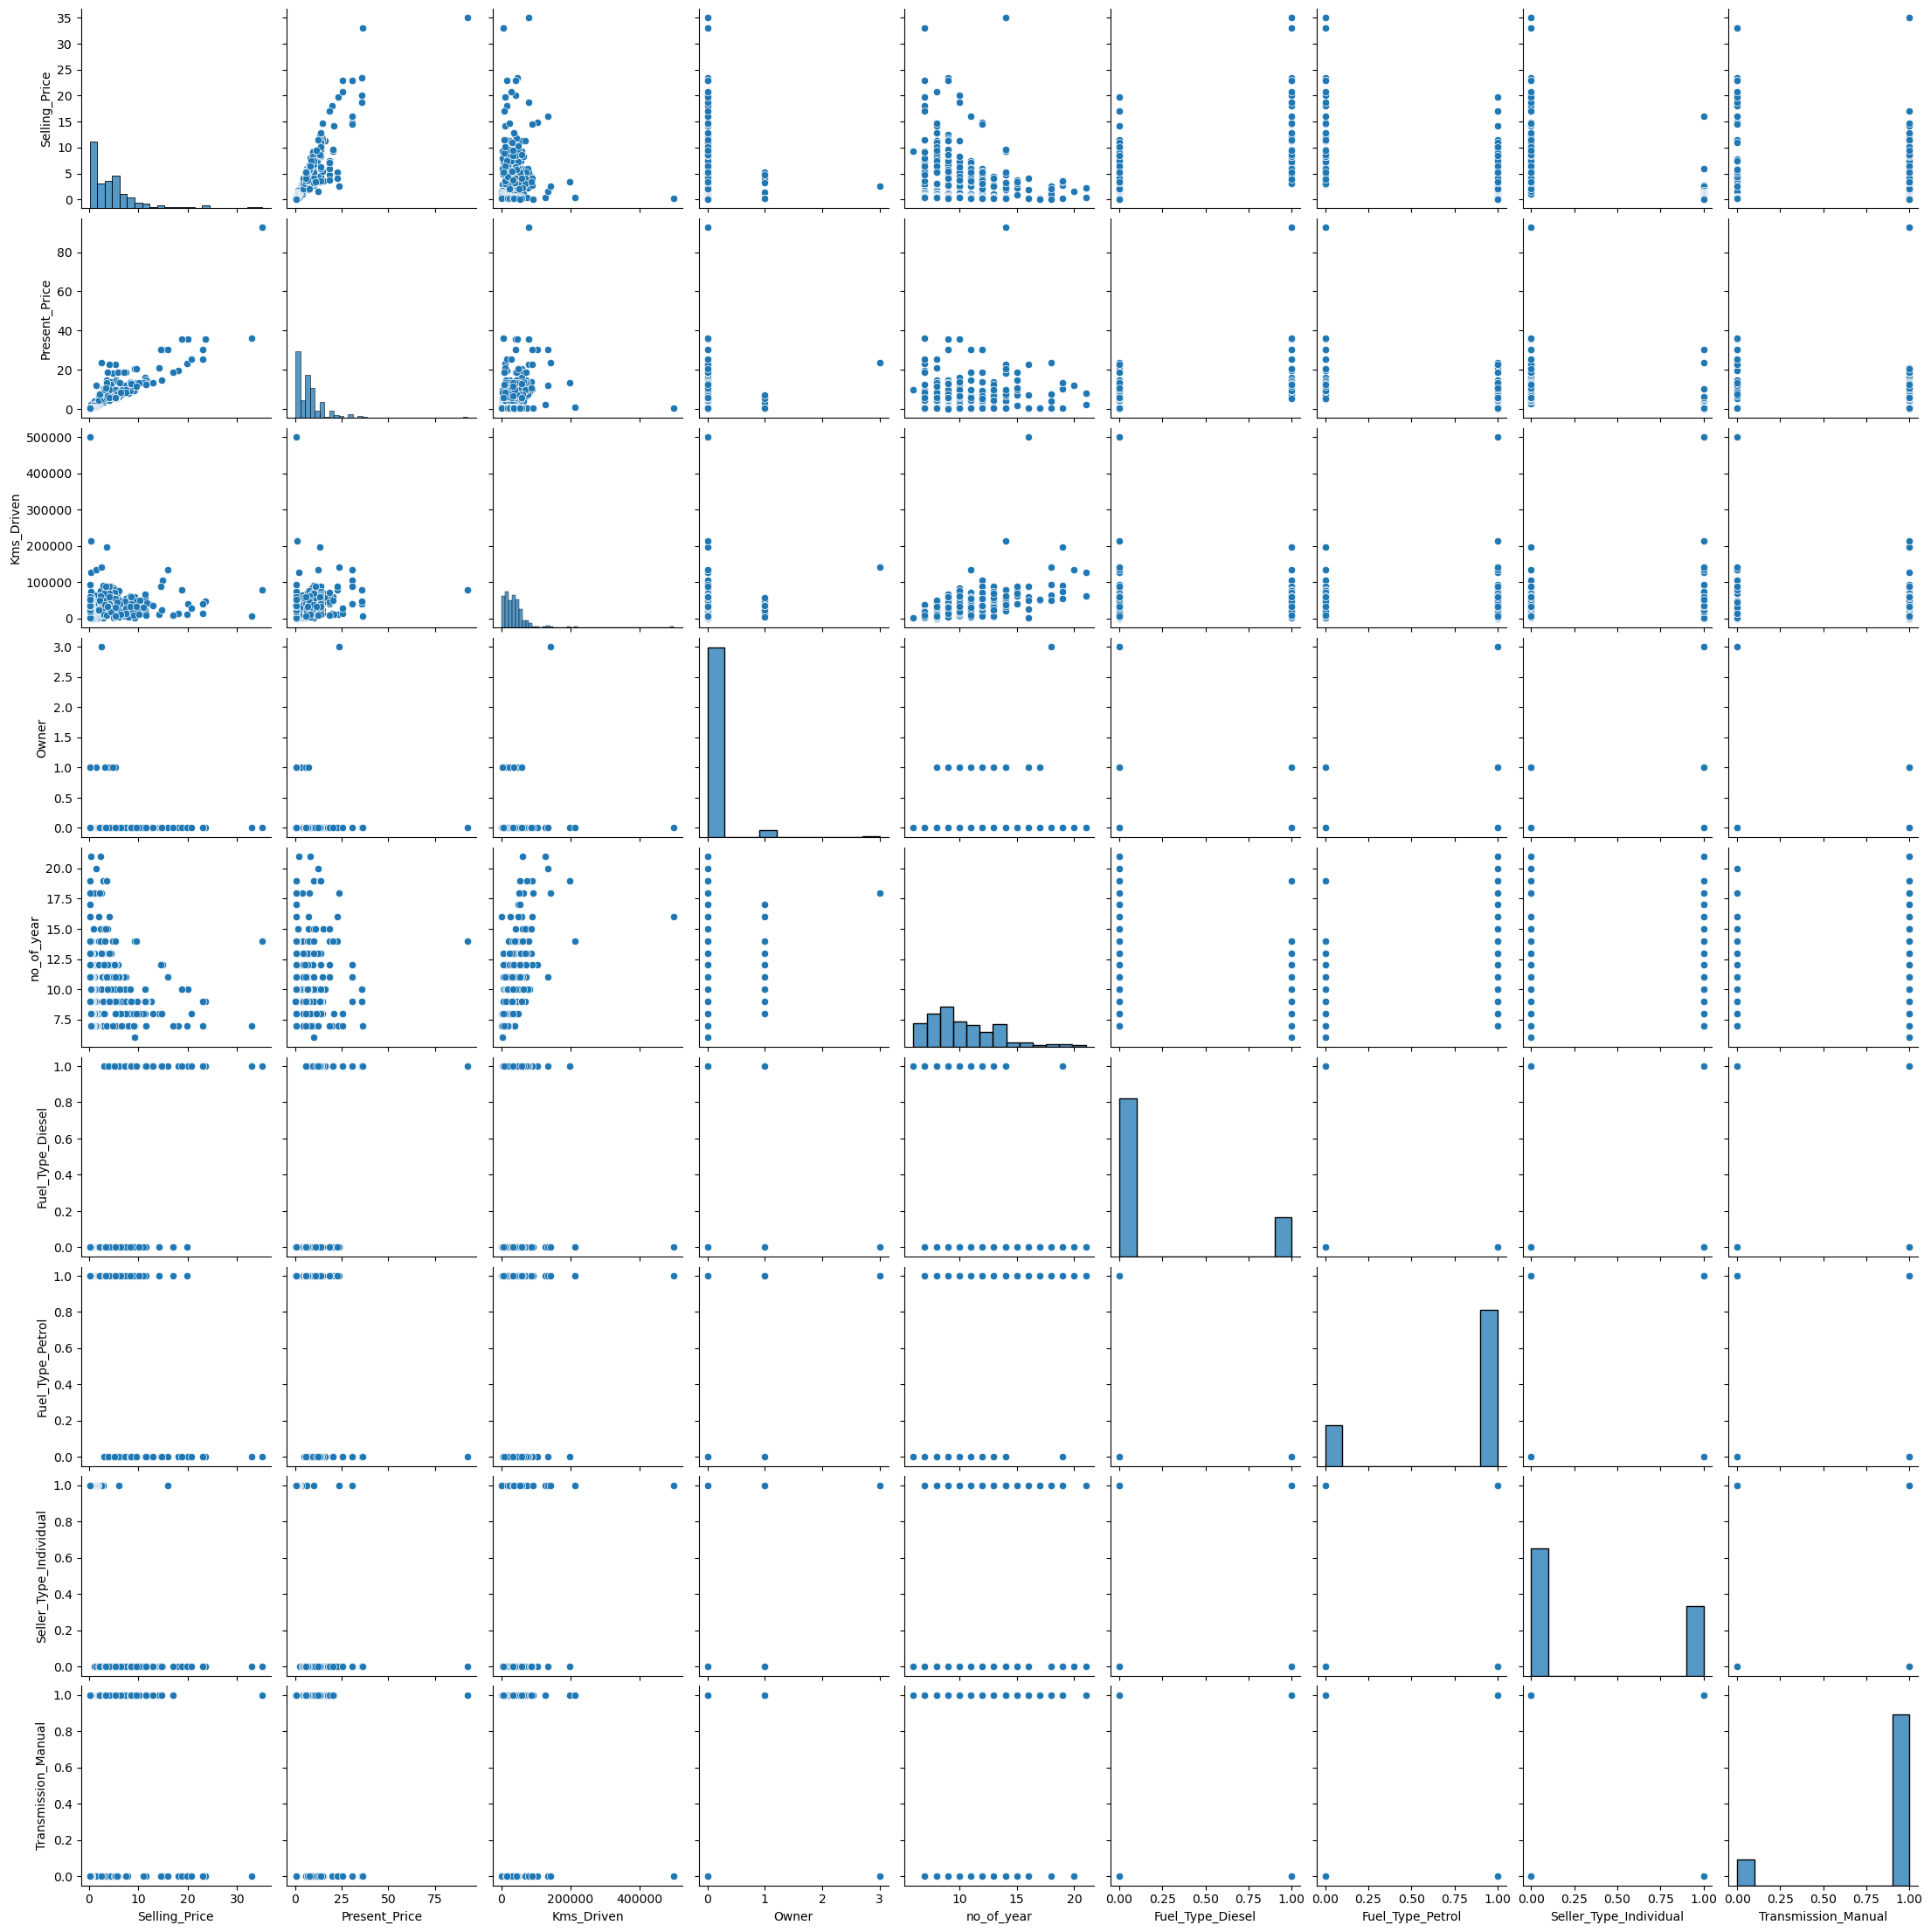

In [22]:
#Plot scatter graph and bar graph b/w all features and target
sns.pairplot(new_df)
plt.show()

<Axes: >

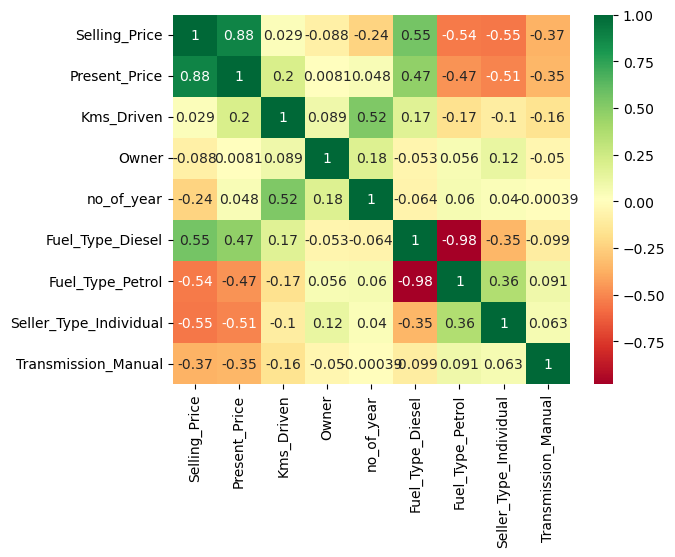

In [21]:
#heatmap plot show correlation b/w all features and target
sns.heatmap(data=new_df.corr(),annot=True,cmap='RdYlGn')

#Split the Features and Target

In [31]:
# x=np.array(new_df.iloc[:,1:].values)
# y=np.array(new_df.iloc[:,0].values)
x=new_df.iloc[:,1:]
y=new_df.iloc[:,0]

Feature seletion (Feature importance)

In [28]:
from sklearn.ensemble import ExtraTreesRegressor

In [32]:
model=ExtraTreesRegressor()
feat_imp=model.fit(x,y)

In [33]:
feat_imp.feature_importances_

array([3.99899494e-01, 4.45305985e-02, 3.08636765e-04, 7.72193049e-02,
       2.16285560e-01, 9.06663260e-03, 1.19157944e-01, 1.33531829e-01])

<Axes: >

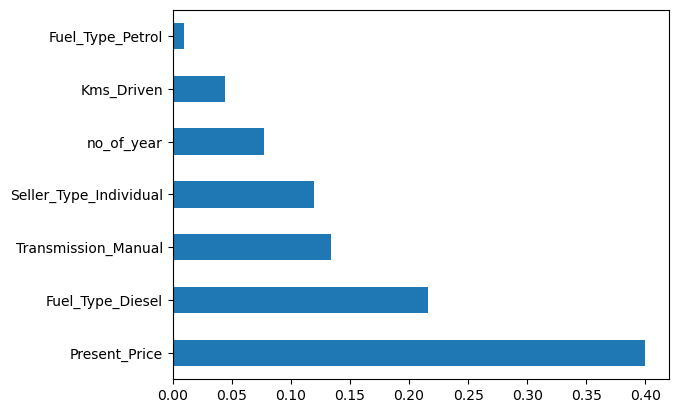

In [37]:
imp=pd.Series(feat_imp.feature_importances_,index=x.columns)
imp.nlargest(7).plot(kind='barh')

splitting the data

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

model selection

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [46]:
regressor=RandomForestRegressor()

Hyper Parameter Tuning

In [49]:
n_estimators=[int(i) for i in np.linspace(start=100,stop=1200,num=12)]

max_features=['auto','sqrt']

max_depth=[int(i) for i in np.linspace(start=5,stop=30,num=6)]

min_samples_split=[2,5,10,15,100]

min_samples_leaf=[1,2,5,10]

In [51]:
random_grid={'n_estimators':n_estimators,
            'max_features':max_features,
            "max_depth":max_depth,
            "min_samples_split":min_samples_split,
             'min_samples_leaf':min_samples_leaf
            }
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [53]:
from sklearn.model_selection import RandomizedSearchCV

In [55]:
rf_regressor=RandomizedSearchCV(estimator=regressor,
                                param_distributions=random_grid,
                               scoring='neg_mean_squared_error',
                               cv=5,
                               random_state=42,
                               n_jobs=1)

training the model

In [57]:
rf_regressor.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages\

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error')

In [58]:
rf_regressor.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

prediction

In [60]:
y_pred=rf_regressor.predict(x_test)

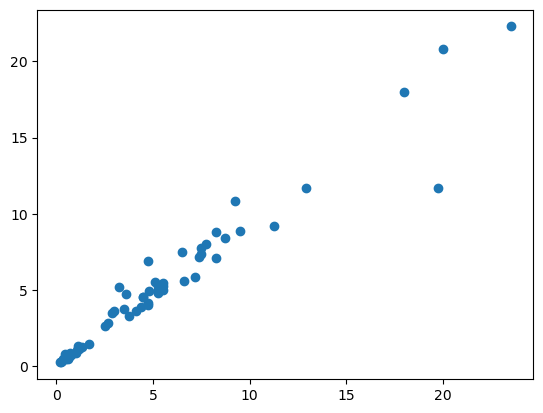

In [61]:
plt.scatter(y_test,y_pred)

In [62]:
finaldf=pd.DataFrame({'Actual':y_test,"Predicted":y_pred})

<Axes: >

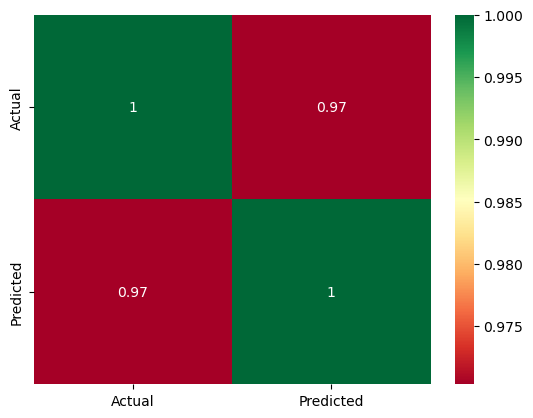

In [63]:
sns.heatmap(data=finaldf.corr(),annot=True,cmap='RdYlGn')

Performance /Accuracy

In [68]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [69]:
r2_score(y_test,y_pred)

0.9382839343378653

# Linear Regressor

In [71]:
from sklearn.linear_model import LinearRegression

In [74]:
model=LinearRegression()

Train model on the training data

In [76]:
model.fit(x_train,y_train)

Make the prediction


In [78]:
y_pred=model.predict(x_test)

Performance and Accuracy

In [79]:
r2_score(y_test,y_pred)

0.9144342972228521

# Decision Tree Regressor

In [87]:
from sklearn.tree import DecisionTreeRegressor

In [88]:
regressor=DecisionTreeRegressor()

Train model on the training data

In [89]:
regressor.fit(x_train,y_train)

DecisionTreeRegressor()

Make the prediction

In [90]:
y_pred=regressor.predict(x_test)

Performance and Accuracy

In [91]:
r2_score(y_test,y_pred)

0.9687496034315499